In [1]:
## numerical librarires
import numpy as np
from numpy import linalg as la
from numpy.random import normal
import random

from sklearn.decomposition import FastICA

## graphing
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## misc
import time
from ipywidgets import interact
import pickle

In [2]:
from diffusion_maps import make_gaussian_data
from diffusion_maps import run_diffusion_map
from diffusion_maps import generate_data_n_gaussians

In [3]:
printing_calculations = False

## Start with a simple Gaussian

In [4]:
params = {}

params["mus"] = [0.] ## data distribution mean.
params["sigma"] = 1.0 ## data distribution standard deviation.
params["epsilon"] = 1. ## cutoff for nearest neighbors, if using epsilon_cutoff (default).
params["gaussian_epsilon"] = 0.4 ## width of Gaussian kernel.
params["num_neighbors"] = 50## cutoff of number of neighbors, if using epsilon_cutoff
params["alpha"] = 0.5 ## coefficient to use for diffusion maps. See the wikipedia article.

params["dim"] = 1 ## number of dimensions in which to generate data
params["data_size"] = 600 ## total number of points
params["n"] = 1 ## for n_gaussians, number of gaussian wells
params["eigen_dims"] = 14 ## number of lower dimensions to consider, i.e. number of eigenvectors to find.

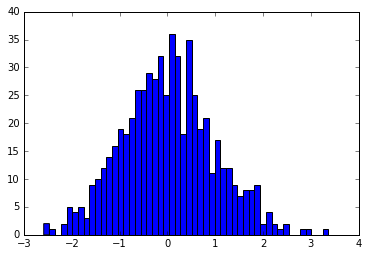

In [7]:
## Make three well-separated Gaussians

data = generate_data_n_gaussians(params)
data.sort(key = lambda z: z[0] / abs(z[0]) * np.sqrt(sum([el**2 for el in z])))
plt.hist([el[0] for el in np.asarray(data)],bins=50);

[ 1.          0.95255693  0.87813007  0.76381287  0.58430866  0.38983429
  0.24421016  0.13368296  0.05340801  0.04489318  0.04237966 -0.04066565
 -0.05719992 -0.06365902]


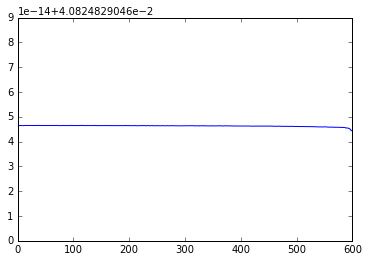

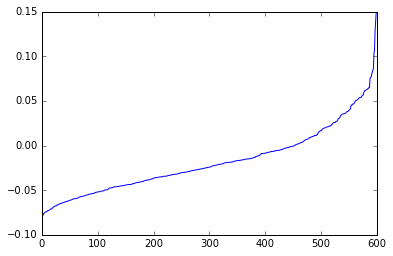

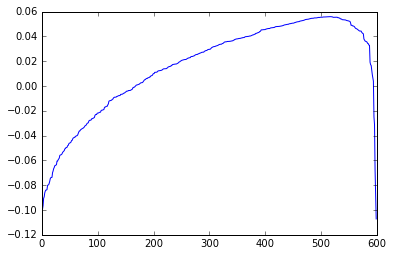

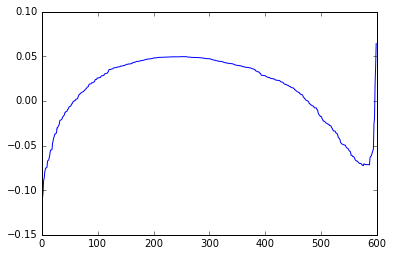

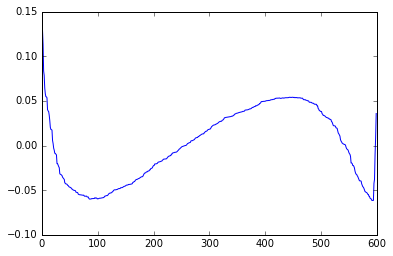

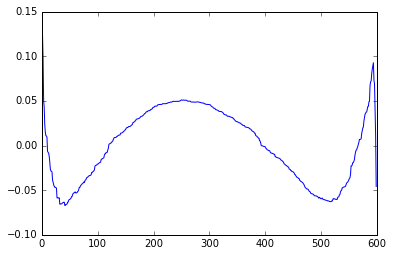

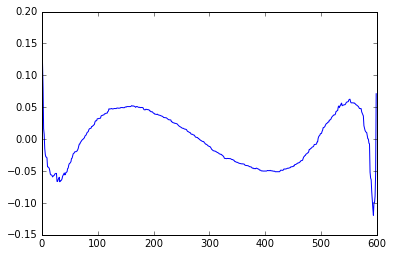

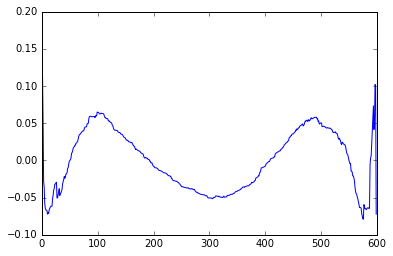

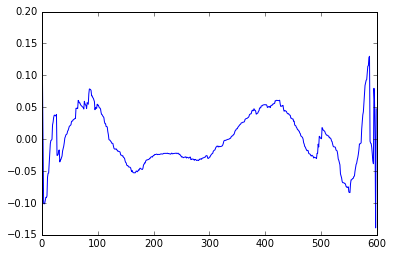

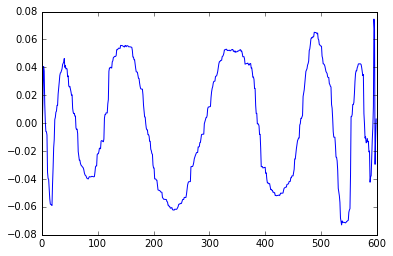

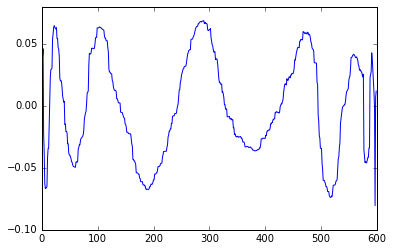

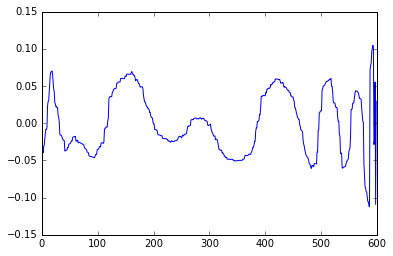

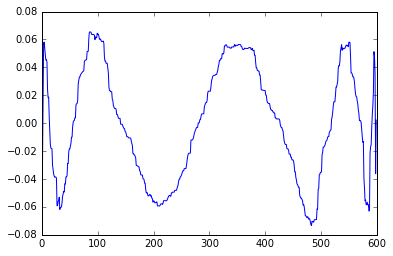

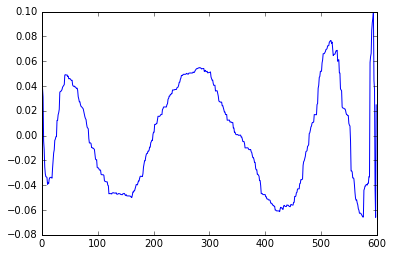

In [8]:
params["alpha"] = 1. ## coefficient to use for diffusion maps. See the wikipedia article.
e_vals, e_vecs = run_diffusion_map(data, params)

e_vals / la.norm(e_vals)
print e_vals
for vec in e_vecs.T:
    plt.plot(vec)
    plt.show()

## Using num_neighbors instead of epsilon_cutoff

using num_neighbors  
[ 1.          0.99112357  0.97559282  0.9589958   0.94059714  0.92395615
  0.85562639  0.83967587  0.79447281  0.74931223  0.71062998  0.66929221
  0.63608389  0.57647396]


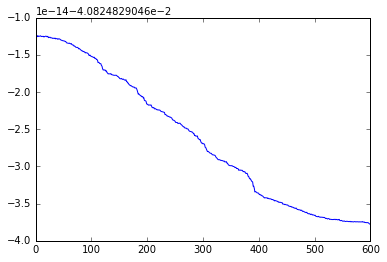

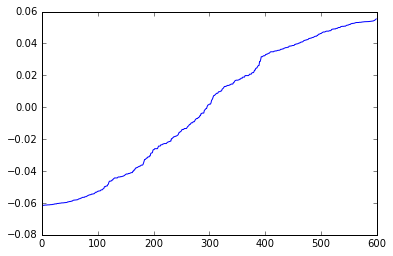

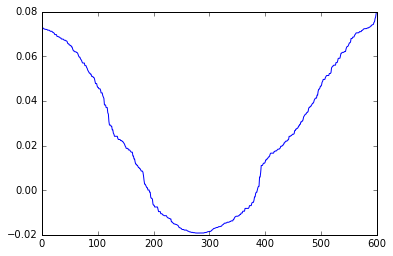

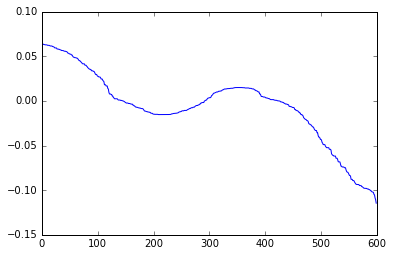

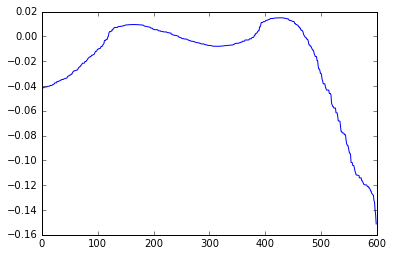

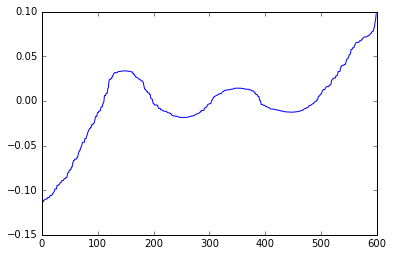

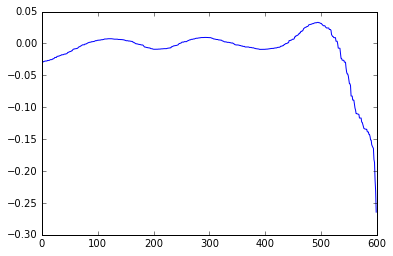

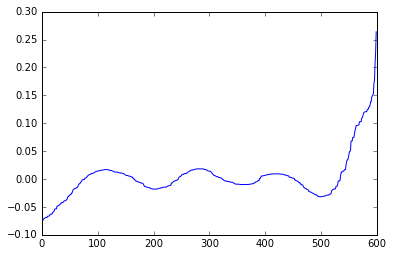

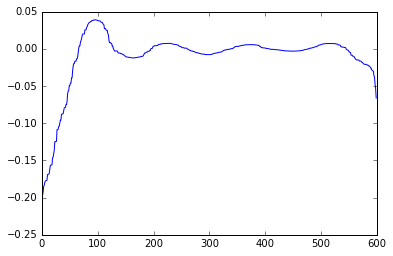

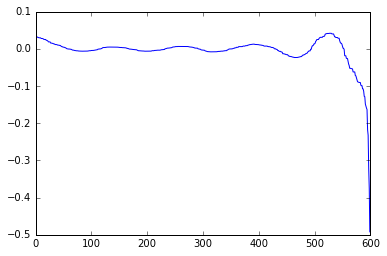

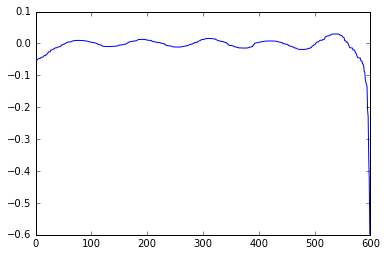

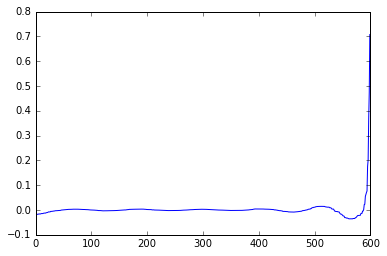

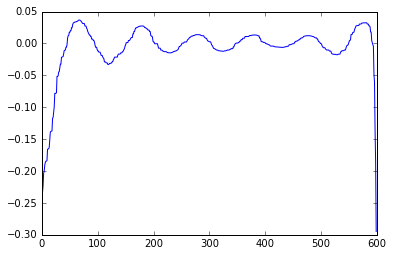

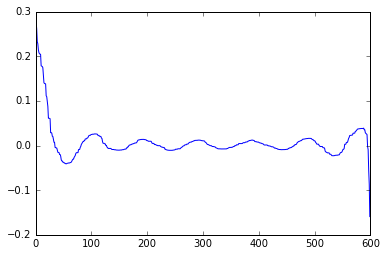

In [9]:
params["alpha"] = 1. ## coefficient to use for diffusion maps. See the wikipedia article.
e_vals, e_vecs = run_diffusion_map(data, params, neighbor_selection = "num_neighbors")

e_vals / la.norm(e_vals)
print e_vals
for vec in e_vecs.T:
    plt.plot(vec)
    plt.show()

## Next we'll look at different values of $\alpha$ for 3 wells.

In [4]:
params = {}

params["mus"] = [0.,-6.,6.] ## data distribution mean.
params["sigma"] = 1.0 ## data distribution standard deviation.
params["epsilon"] = 3. ## cutoff for nearest neighbors.
params["gaussian_epsilon"] = 3. ## width of Gaussian kernel.
params["alpha"] = 0.5 ## coefficient to use for diffusion maps. See the wikipedia article.

params["dim"] = 1 ## number of dimensions in which to generate data
params["data_size"] = 300 ## total number of points
params["n"] = 3 ## for n_gaussians, number of gaussian wells
params["eigen_dims"] = 4  ## number of lower dimensions to consider, i.e. number of eigenvectors to find.

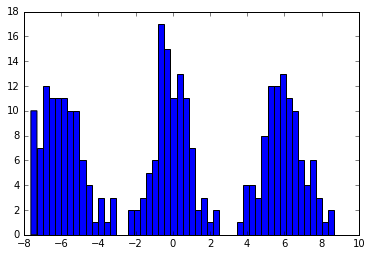

In [5]:
## Make three well-separated Gaussians

data = generate_data_n_gaussians(params)
data.sort(key = lambda z: z[0] / abs(z[0]) * np.sqrt(sum([el**2 for el in z])))
plt.hist([el[0] for el in np.asarray(data)],bins=50);

[ 1.          0.99201331  0.97181704  0.36412581]


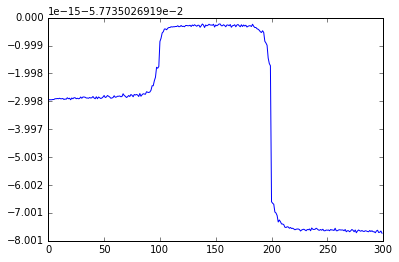

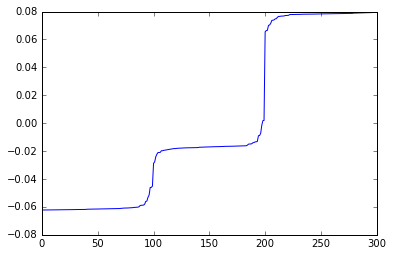

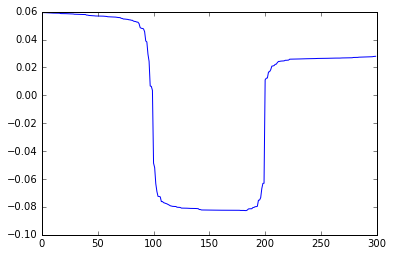

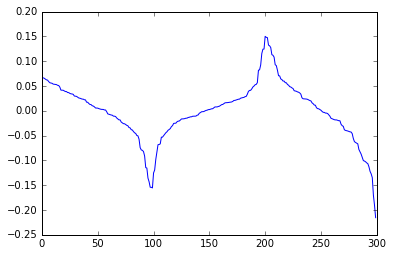

In [6]:
## alpha == 0.5 case. This corresponds to a diffusion.

params["alpha"] = 0.5 ## coefficient to use for diffusion maps. See the wikipedia article.
e_vals, e_vecs = run_diffusion_map(data, params)

e_vals / la.norm(e_vals)
print e_vals
for vec in e_vecs.T:
    plt.plot(vec)
    plt.show()

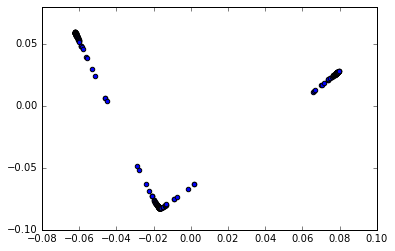

In [7]:
plt.scatter(e_vecs.T[1],e_vecs.T[2])

[ 1.          0.99635913  0.98664325  0.47243907]


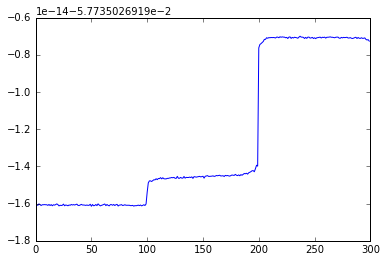

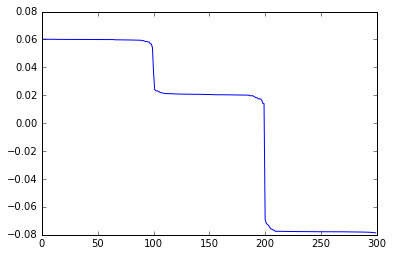

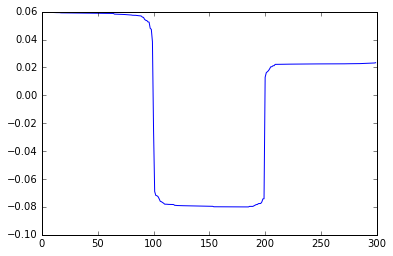

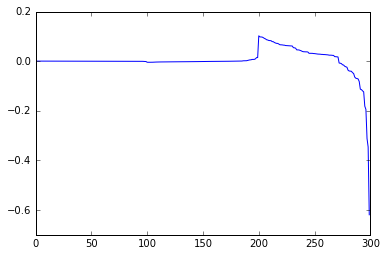

In [8]:
## alpha == 1 case finds coordinates regardless of probability density.

params["alpha"] = 1.0 ## coefficient to use for diffusion maps. See the wikipedia article.
e_vals, e_vecs = run_diffusion_map(data, params)
e_vals / la.norm(e_vals)
print e_vals
for vec in e_vecs.T:
    plt.plot(vec)
    plt.show()

Something fun to try for the $\alpha = 1$ case at least:

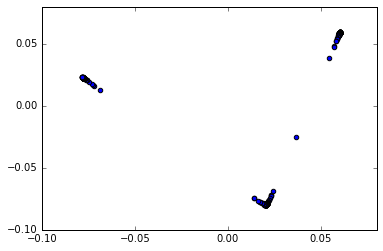

In [9]:
plt.scatter(e_vecs.T[1],e_vecs.T[2])

[ 1.          0.99777545  0.99246407  0.26063877]


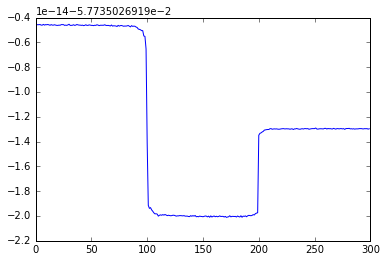

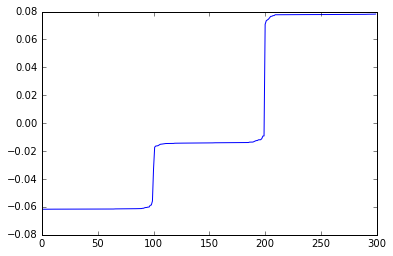

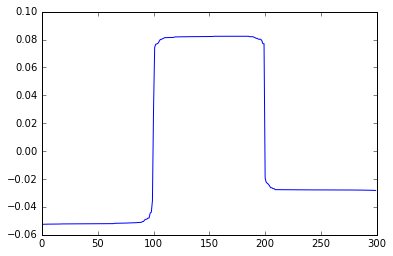

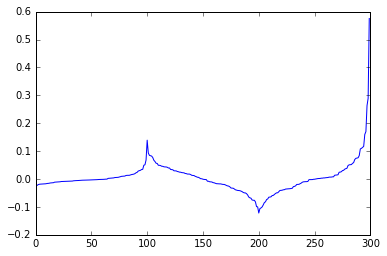

In [10]:
## Finally, alpha == 0 is the 

params["alpha"] = 0.0 ## coefficient to use for diffusion maps. See the wikipedia article.
e_vals, e_vecs = run_diffusion_map(data, params)
e_vals / la.norm(e_vals)
print e_vals

for vec in e_vecs.T:
    plt.plot(vec)
    plt.show()

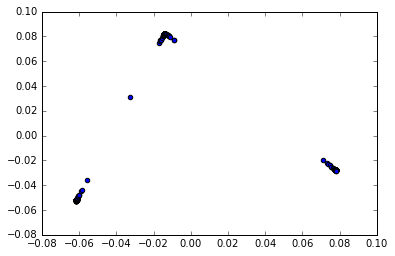

In [11]:
plt.scatter(e_vecs.T[1],e_vecs.T[2])

## 1D experiment -- Spiral

Let's replicate example 1 in http://pca.narod.ru/10MainGorbanKeglWunschZin.pdf

Furthermore, let's see what happens as we change the radius $epsilon$ to see how the results depend on the radius of the Gaussian chosen.

The average distance between points is 0.0833. Below we experiment with different values of the Gaussian radius. 

In [77]:
from mpl_toolkits.mplot3d import Axes3D

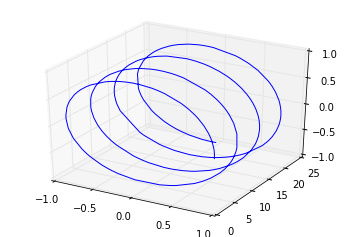

In [78]:
t = sorted([random.uniform(0, 15*np.pi/2) for i in range(400)])
xs,ys,zs = list(np.cos(t)), list(t), list(np.sin(t))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(xs, ys, zs)

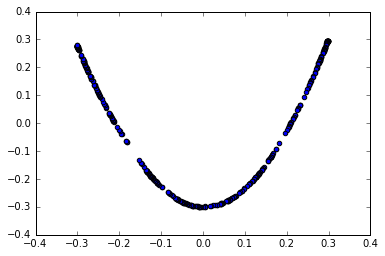

In [79]:
data = [[x,y,z] for x,y,z in zip(xs,ys,zs)]

params = {}
params["epsilon"] = 1. ## cutoff for nearest neighbors.
params["gaussian_epsilon"] = 0.5 ## width of Gaussian kernel.
params["alpha"] = 1. ## coefficient to use for diffusion maps. See the wikipedia article.

params["data_size"] = 400
params["eigen_dims"] = 5

e_vals, e_vecs = run_diffusion_map(data, params,True)
v1,v2,v3 = (e_vecs.T)[0:3]
plt.scatter(v2,v3)

In [80]:
e_vals

array([ 1.        ,  0.99900789,  0.99614185,  0.99069765,  0.98376168])

## We can explore how the $\phi_2$ vs $\phi_1$ graphs change.

In [81]:
def make_vecs(gauss_eps):
    params = {}
    params["epsilon"] = 1. ## cutoff for nearest neighbors.
    params["gaussian_epsilon"] = gauss_eps ## width of Gaussian kernel.
    params["alpha"] = 1. ## coefficient to use for diffusion maps. See the wikipedia article.

    params["data_size"] = 400
    params["eigen_dims"] = 3

    e_vals, e_vecs = run_diffusion_map(data, params)
    v1,v2,v3 = (e_vecs.T)[0:3]
    return v2,v3

In [88]:
stepping_tuple = low,high,inter = 0,20,1
D = {i:val for i,val in enumerate(np.linspace(0.03,0.1,high + 1))}

In [89]:
plot_scatter = {}
for i in D.keys():
    plot_scatter[i] = make_vecs(D[i])

In [90]:
def plot_scatter_saved(i):
    v2,v3 = plot_scatter[i]
    plt.figure(figsize=(10,10))    
    plt.scatter(v2,v3)
    plt.show()

In [91]:
F = lambda i: plot_scatter_saved(i)

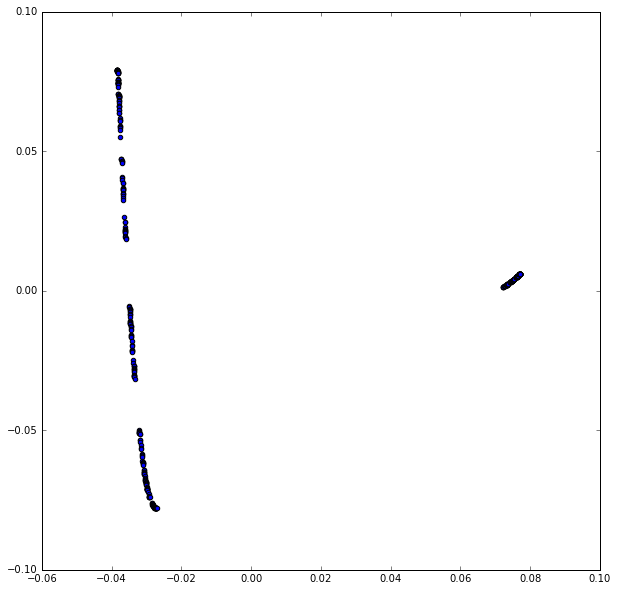

In [92]:
interact(F, i=stepping_tuple )

In [87]:
## write to file
pickle.dump( plot_scatter, open( "scatterplots.p", "wb" ) )

In [22]:
## read from file
plot_scatter = pickle.load( open( "scatterplots.p", "rb" ) )

## Swiss roll (also used as an example in http://pca.narod.ru/10MainGorbanKeglWunschZin.pdf)

## Non-degenerate case, H = 50


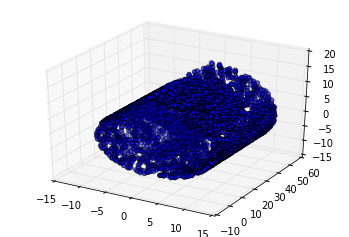

In [24]:

H = 50.
num_points = 5000

t = sorted([random.uniform(3.*np.pi/2., 9.*np.pi/2) for i in range(num_points)])
h = [random.uniform(0,H) for i in range(num_points)]
xs,ys,zs = list(t * np.cos(t)), list(h) , list(t * np.sin(t))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xs, ys, zs)

In [25]:
data = [[x,y,z] for x,y,z in zip(xs,ys,zs)]

params = {}
params["epsilon"] = 4. ## cutoff for nearest neighbors.
params["gaussian_epsilon"] = 2. ## width of Gaussian kernel.
params["alpha"] = 1. ## coefficient to use for diffusion maps. See the wikipedia article.

params["data_size"] = num_points
params["eigen_dims"] = 7

e_vals, e_vecs = run_diffusion_map(data, params,True)

In [26]:
e_vals

array([ 1.        ,  0.99898159,  0.99682442,  0.99588932,  0.99578972,
        0.99274839,  0.99079477])

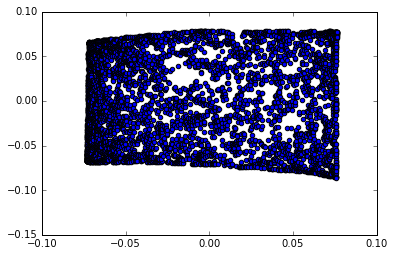

In [27]:
plt.scatter(e_vecs.T[1],e_vecs.T[2])

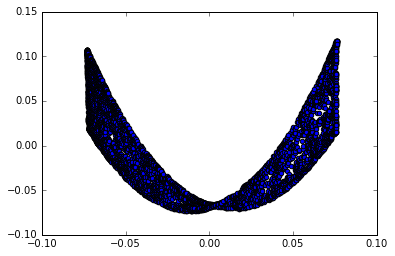

In [28]:
plt.scatter(e_vecs.T[1],e_vecs.T[3])

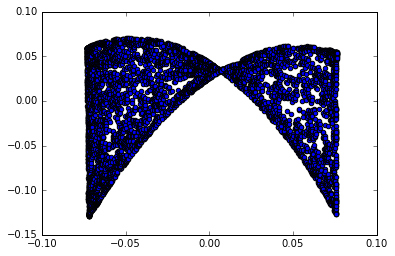

In [29]:
plt.scatter(e_vecs.T[1],e_vecs.T[4])

## Degenerate case, H = 30


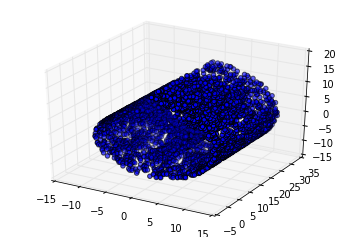

In [45]:
H = 30.
num_points = 5000

t = sorted([random.uniform(3.*np.pi/2., 9.*np.pi/2) for i in range(num_points)])
h = [random.uniform(0,H) for i in range(num_points)]
xs,ys,zs = list(t * np.cos(t)), list(h) , list(t * np.sin(t))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xs, ys, zs)

In [46]:
data = [[x,y,z] for x,y,z in zip(xs,ys,zs)]

params = {}
params["epsilon"] = 4. ## cutoff for nearest neighbors.
params["gaussian_epsilon"] = 2. ## width of Gaussian kernel.
params["alpha"] = 1. ## coefficient to use for diffusion maps. See the wikipedia article.

params["data_size"] = num_points
params["eigen_dims"] = 5

e_vals, e_vecs = run_diffusion_map(data, params,True)

In [47]:
e_vals

array([ 1.        ,  0.99895864,  0.99578359,  0.9910448 ,  0.99059924])

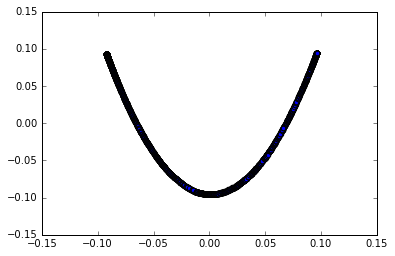

In [48]:
plt.scatter(e_vecs.T[1],e_vecs.T[2])

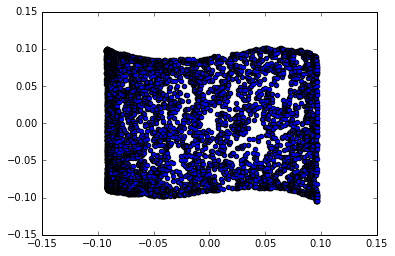

In [49]:
plt.scatter(e_vecs.T[1],e_vecs.T[3])

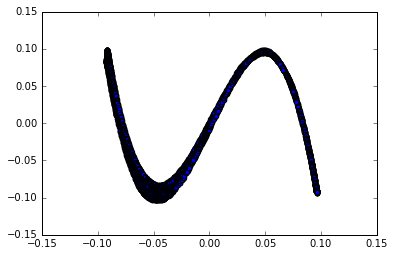

In [50]:
plt.scatter(e_vecs.T[1],e_vecs.T[4])

## Note: I used $\alpha = 1$ here to account for density, I do the 0.5 case below.

## Suggestion: compute mutual information between mutual coordinates to find degeneracy/redundancy. If a coordinate gives no information it can be left unused. Also, it seems like sometimes close eigenvectors get mixed. Taking a linear combination to minimize the mutual information might be an interesting idea.

## Degenerate case with $\alpha = 0.5$.

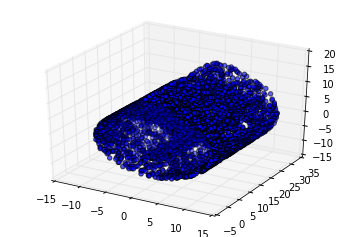

In [51]:
H = 30.
num_points = 5000

t = sorted([random.uniform(3.*np.pi/2., 9.*np.pi/2) for i in range(num_points)])
h = [random.uniform(0,H) for i in range(num_points)]
xs,ys,zs = list(t * np.cos(t)), list(h) , list(t * np.sin(t))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(xs, ys, zs)

In [63]:
## Use alpha = 0.5 to see what happens

data = [[x,y,z] for x,y,z in zip(xs,ys,zs)]

params = {}
params["epsilon"] = 4. ## cutoff for nearest neighbors.
params["gaussian_epsilon"] = 2. ## width of Gaussian kernel.
params["alpha"] = 0.5 ## coefficient to use for diffusion maps. See the wikipedia article.

params["data_size"] = num_points
params["eigen_dims"] = 10

e_vals, e_vecs = run_diffusion_map(data, params,True)
print e_vals

[ 1.          0.99901452  0.99592065  0.99071876  0.99022147  0.9895585
  0.98689105  0.98314676  0.98176848  0.97477701]


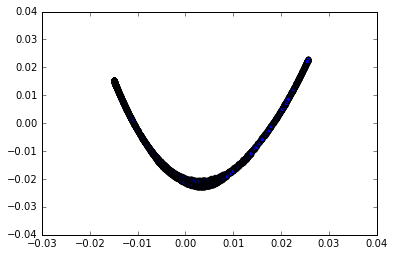

In [64]:
plt.scatter(e_vecs.T[1],e_vecs.T[2])

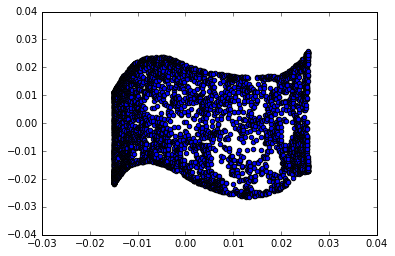

In [65]:
plt.scatter(e_vecs.T[1],e_vecs.T[3])

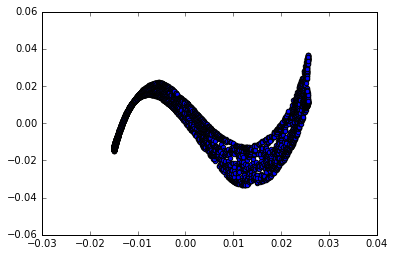

In [66]:
plt.scatter(e_vecs.T[1],e_vecs.T[4])

## It looks like the two degenerate vectors can be separated in some linear way (i.e. the last two diagrams above).

## Next, let's separate the degenerate eigenvectors using ICA.

In [67]:
min_eig = 3
max_eig = 4

In [68]:
X = e_vecs.T[min_eig:max_eig+1]

In [69]:
ica = FastICA(n_components=2)
S_ = ica.fit_transform(X.T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix


In [70]:
A_ ## rotation of degenerate eigenspace

array([[-0.96196845, -0.28164381],
       [ 0.2817103 , -0.96157707]])

In [71]:
e_vecs_separated = np.asmatrix(e_vecs[:,min_eig:max_eig+1]) * A_

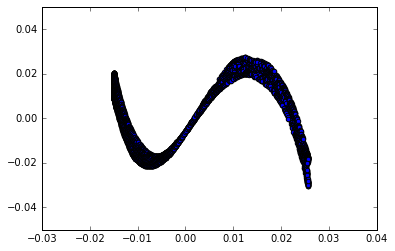

In [72]:
## one separated coordinate versus first coordinate

plt.scatter(e_vecs.T[1],np.asarray(e_vecs_separated.T[1])[0])

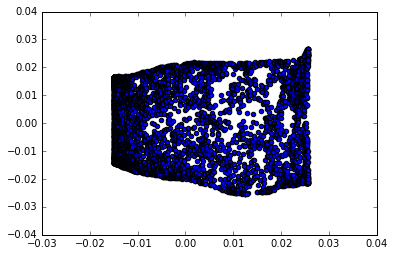

In [73]:
## second separated coordinate versus first coordinate

plt.scatter(e_vecs.T[1],np.asarray(e_vecs_separated.T[0])[0])